 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [238]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [276]:
# Reading whale returns
whale_returns_csv = Path("data/whale_returns.csv")
# YOUR CODE HERE
whale_returns_csv = pd.read_csv(whale_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [213]:
# Count nulls
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [214]:
# Drop nulls
whale_returns_csv.dropna(inplace=True)


In [215]:
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [216]:
# Reading algorithmic returns
algo_returns_csv = Path("data/algo_returns.csv")
algo_returns_csv = pd.read_csv(algo_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_csv

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [217]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [218]:
# Drop nulls
algo_returns_csv.dropna(inplace = True)
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [219]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("data/sp500_history.csv")
sp500_history_csv = pd.read_csv(sp500_history_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_csv.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [220]:
# Check Data Types
type(sp500_history_csv.iloc[1])

pandas.core.series.Series

In [221]:
# Fix Data Type
sp500_history_csv['Close'] = sp500_history_csv['Close'].str.replace(r'$', '').astype(float)

In [222]:
# Calculate Daily Returns
sp500_history_csv['Close'] = sp500_history_csv['Close'].pct_change()
sp500_history_csv.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [223]:
# Drop nulls
sp500_history_csv.dropna(inplace=True)

In [224]:
# Rename Column
sp500_history_csv.rename(columns={"Close": "SP_500"}, inplace=True)
sp500_history_csv.head()

,SP_500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [225]:
# Concatenate all DataFrames into a single DataFrame
returns_df = pd.merge(whale_returns_csv, algo_returns_csv, how='left', on=['Date'])
returns_df2 = pd.merge(returns_df,sp500_history_csv, how='left', on=['Date'])
returns_df2 = returns_df2.rename(columns={"SOROS FUND MANAGEMENT LLC": "SOROS",
                            "PAULSON & CO.INC." : "PAULSON",
                            "TIGER GLOBAL MANAGEMENT LLC": "TIGER",
                            "BERKSHIRE HATHAWAY INC":"BH"})
returns_df2.head(10)

,SOROS,PAULSON & CO.INC.,TIGER,BH,Algo 1,Algo 2,SP_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

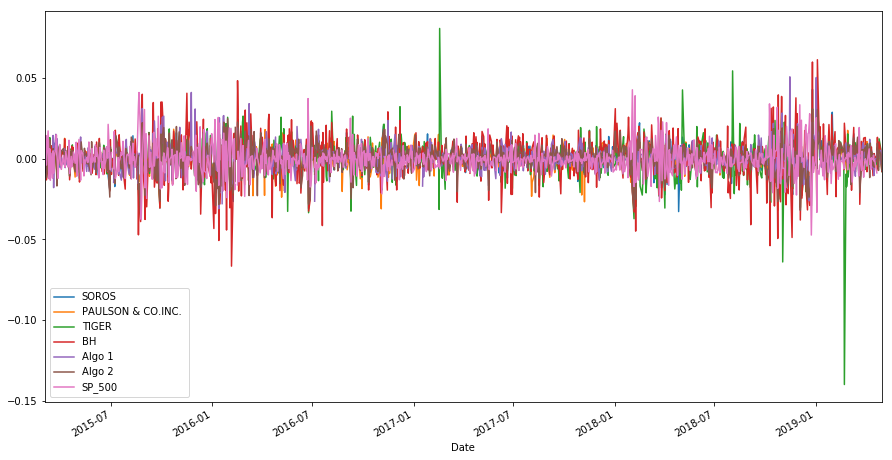

In [226]:
# Plot daily returns

returns_df2.plot(figsize=[15,8])

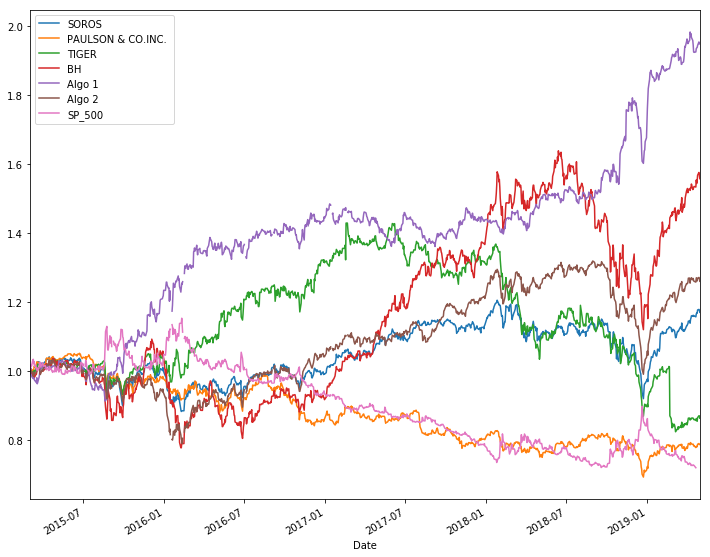

In [228]:
# Plot cumulative returns
(returns_df2+1).cumprod().plot(figsize=[12,10])

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

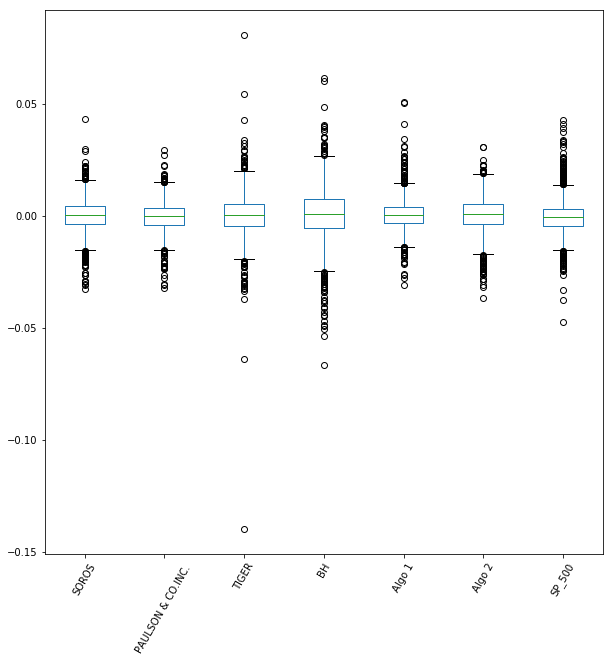

In [229]:
# Box plot to visually show risk

returns_df2.plot(kind="box", figsize=[10,10], rot=60)

In [230]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = returns_df2.std()
daily_std

SOROS                 0.007842
PAULSON & CO.INC.     0.006977
TIGER                 0.010824
BH                    0.012831
Algo 1                0.007601
Algo 2                0.008327
SP_500                0.008587
dtype: float64

Assuming we are using standard deviation as our measurement of risk, Tiger and Berkshire are riskier that the S&P 500.

In [231]:
# Determine which portfolios are riskier than the S&P 500
returns_df2.std() > returns_df2['SP_500'].std()

SOROS                 False
PAULSON & CO.INC.     False
TIGER                  True
BH                     True
Algo 1                False
Algo 2                False
SP_500                False
dtype: bool

In [232]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS                 0.124487
PAULSON & CO.INC.     0.110754
TIGER                 0.171830
BH                    0.203682
Algo 1                0.120660
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

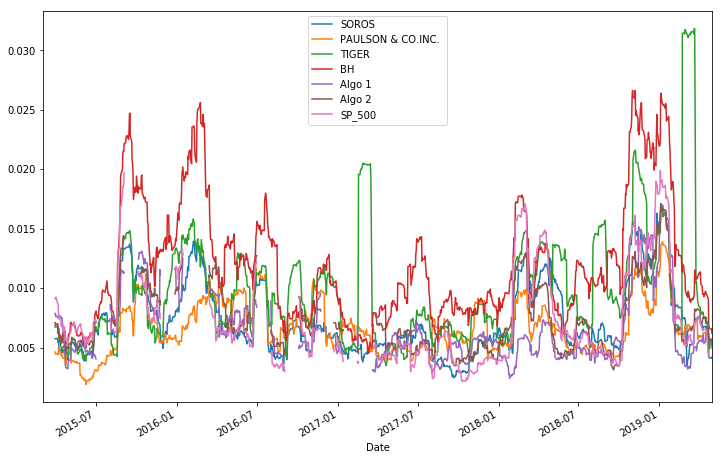

In [233]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
returns_df2.rolling(21).std().plot(figsize=[12,8])

In [234]:
# Construct a correlation table
corr = returns_df2.corr()
corr

,SOROS,PAULSON & CO.INC.,TIGER,BH,Algo 1,Algo 2,SP_500
SOROS,1.000000,0.700181,0.561745,0.754308,0.321366,0.826719,0.000574
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.269257,0.677993,0.013549
TIGER,0.561745,0.435333,1.000000,0.425102,0.164840,0.508139,-0.001505
BH,0.754308,0.545802,0.425102,1.000000,0.292307,0.687717,-0.013856
Algo 1,0.321366,0.269257,0.164840,0.292307,1.000000,0.288367,-0.033963
Algo 2,0.826719,0.677993,0.508139,0.687717,0.288367,1.000000,-0.002192
SP_500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207A78D00B8>,
      dtype=object)

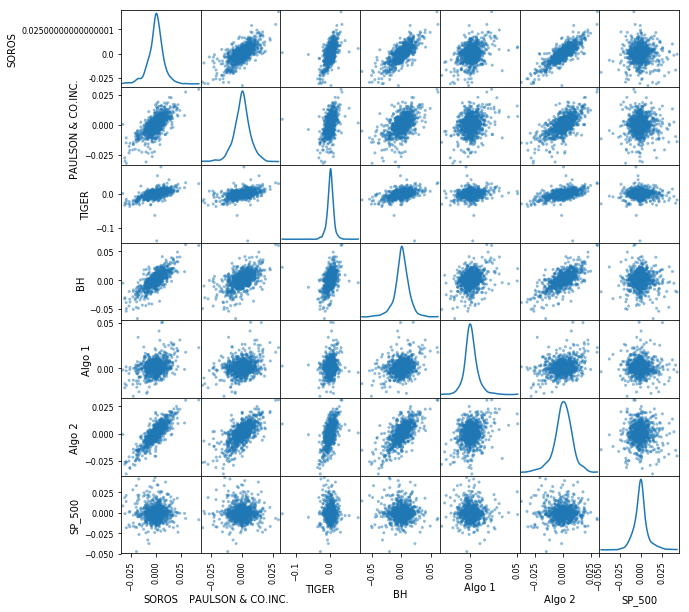

In [235]:
pd.plotting.scatter_matrix(returns_df2, diagonal='kde', figsize=[10,10])

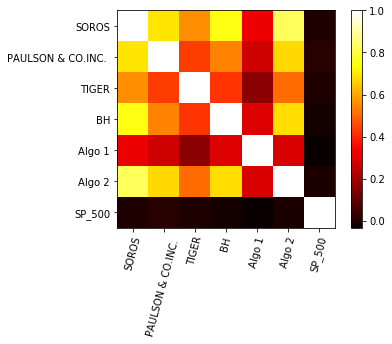

In [236]:
plt.imshow(corr,cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=75)
plt.yticks(range(len(corr)), corr.columns);

### Beta Calculation
covariance = Measure of a stock's return relative to that of the market
variance = Measure of how the market moves relative to its mean.

$Beta = \frac{covariance}{variance}$ 

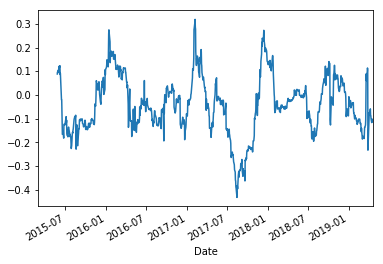

In [275]:
# Beta Calc
covariance = returns_df2['Algo 1'].rolling(60).cov(returns_df2['SP_500'])
variance = returns_df2['SP_500'].rolling(60).var()
beta = (covariance/variance)
beta.plot()

In [265]:
# Calculate alpha dataframe
# Alpha = return-benchmark_return'
cum_returns = (returns_df2+1).cumprod()
cum_returns.head()
alphas = cum_returns.sub([cum_returns['SP_500'],cum_returns['SP_500'],cum_returns['SP_500'],cum_returns['SP_500'],cum_returns['SP_500'],cum_returns['SP_500'], cum_returns['SP_500']]) 

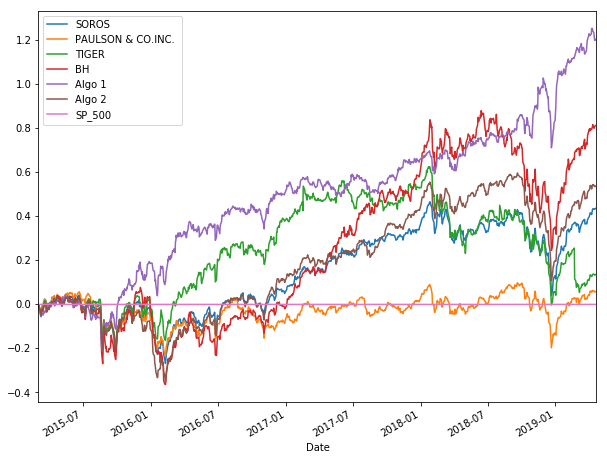

In [266]:
## Alphas 
alphas.plot(figsize=[10,8])

In [267]:
# Useful command to expose index with null
df2 = returns_df2[returns_df2.isna().any(axis=1)]


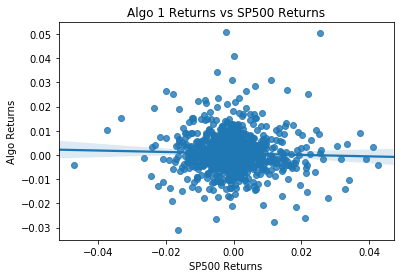

In [268]:
# Linear Regression... Added Analysis
benchmark_ret = returns_df2['SP_500']
port_return = returns_df2['Algo 1']

sns.regplot(benchmark_ret.values, port_return.values)
plt.xlabel("SP500 Returns")
plt.ylabel("Algo Returns")
plt.title("Algo 1 Returns vs SP500 Returns")
plt.show()

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

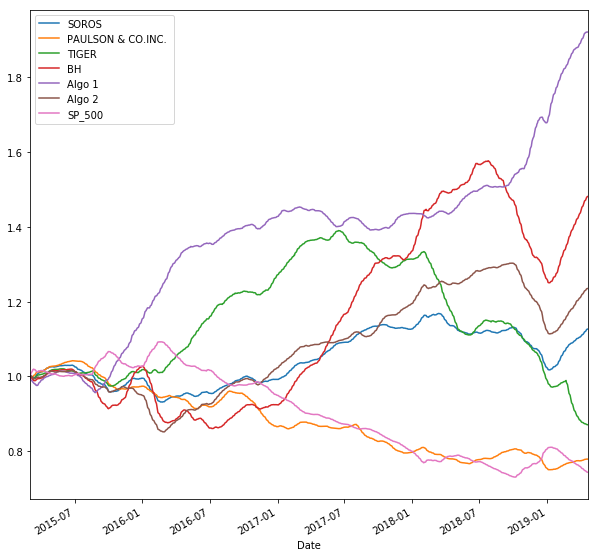

In [277]:
# (OPTIONAL) YOUR CODE HERE
# Rolling Mean

ewa_df = (returns_df2+1).cumprod().ewm(com=21).mean()

ewa_df.plot(figsize=[10,10])

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance



In [62]:
# Annualized Sharpe Ratios
# Calculate Sharpe Ratio
sharpe_ratios = (returns_df2.mean() * 252) / (returns_df2.std() * np.sqrt(252))
sharpe_ratios

SOROS                 0.361568
PAULSON & CO.INC.    -0.462131
TIGER                -0.118257
BH                    0.619628
Algo 1                1.388424
Algo 2                0.485438
SP_500               -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

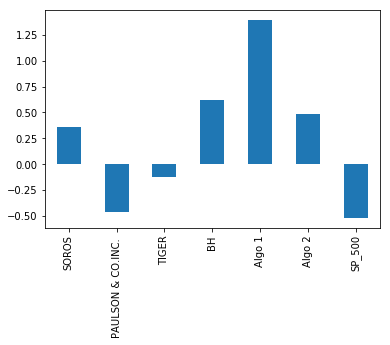

In [63]:
# Visualize the sha[rpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [189]:
# Read CSV Data
# Read coke
coke_file = Path("data/coke.csv")
coke_df = pd.read_csv(coke_file, parse_dates=True, infer_datetime_format=True)
coke_df = coke_df.rename(columns={"Close":"coke"})
# Read Alibaba
baba_file = Path("data/baba.csv")
baba_df = pd.read_csv(baba_file, parse_dates=True, infer_datetime_format=True)
baba_df = baba_df.rename(columns={"Close":"baba"})
# Read BlackRock
blk_file = Path("data/blk.csv")
blk_df = pd.read_csv(blk_file, parse_dates=True, infer_datetime_format=True)
blk_df = blk_df.rename(columns={"Close":"blk"})
# Read zoom
zoom_file = Path("data/zm.csv")
zm_df = pd.read_csv(zoom_file,index_col='Date', infer_datetime_format=True)
zm_df = zm_df.rename(columns={"Close":"zm"})
zm_df.head()
# Read amd
amd_df = pd.read_csv(Path("data/amd.csv"), parse_dates=True, infer_datetime_format=True)
amd_df = amd_df.rename(columns={"Close":"amd"})
# Read csco
csco_df = pd.read_csv(Path("data/csco.csv"), parse_dates=True, infer_datetime_format=True)
csco_df = csco_df.rename(columns={"Close":"csco"})
# Read Google
goog_df = pd.read_csv(Path("data/goog.csv"), parse_dates=True, infer_datetime_format=True)
goog_df = goog_df.rename(columns={"Close":"goog"})
# Read Goldman Sachs
gs_df = pd.read_csv(Path("data/gs.csv"), parse_dates=True, infer_datetime_format=True)
gs_df = gs_df.rename(columns={"Close":"gs"})
# Read Microsoft
msft_df = pd.read_csv(Path("data/msft.csv"), parse_dates=True, infer_datetime_format=True)
msft_df = msft_df.rename(columns={"Close":"msft"})
# Read Nike
nke_df = pd.read_csv(Path("data/nke.csv"), parse_dates=True, infer_datetime_format=True)
nke_df = nke_df.rename(columns={"Close":"nke"})
# Read Tesla
tsla_df = pd.read_csv(Path("data/tsla.csv"), parse_dates=True, infer_datetime_format=True)
tsla_df = tsla_df.rename(columns={"Close":"tsla"})
# Read Twitter
twtr_df = pd.read_csv(Path("data/twtr.csv"), parse_dates=True, infer_datetime_format=True)
twtr_df = twtr_df.rename(columns={"Close":"twtr"})
# Read Facebook
fb_df = pd.read_csv(Path("data/fb.csv"), parse_dates=True, infer_datetime_format=True)
fb_df = fb_df.rename(columns={"Close":"fb"})


In [190]:
# Merge all stocks into a single DataFrame
watchlist = [zm_df, blk_df, baba_df, amd_df, csco_df, goog_df, gs_df, msft_df, nke_df, tsla_df, twtr_df,fb_df]
domestics = pd.merge(coke_df, blk_df, how='left', on='Date')
domestics = pd.merge(domestics, baba_df, how='left', on='Date')
domestics = pd.merge(domestics, amd_df, how='left', on='Date')
domestics = pd.merge(domestics, csco_df, how='left', on='Date')
domestics = pd.merge(domestics, goog_df, how='left', on='Date')
domestics = pd.merge(domestics, gs_df, how='left', on='Date')
domestics = pd.merge(domestics, msft_df, how='left', on='Date')
domestics = pd.merge(domestics, nke_df, how='left', on='Date')
domestics = pd.merge(domestics, tsla_df, how='left', on='Date')
domestics = pd.merge(domestics, twtr_df, how='left', on='Date')
domestics = pd.merge(domestics, fb_df, how='left', on='Date')
domestics = pd.merge(domestics, zm_df, how='left', on='Date')

# set Date as index
domestics['Date'] = domestics['Date'].str.replace(r' 16:00:00', '')
domestics['Date'] = pd.to_datetime(domestics['Date'])
domestics.set_index('Date', inplace=True)

# Calculate Returns
domestic_returns = domestics.pct_change()

# Calculate cumulative returns
domestic_cum_returns = (domestic_returns + 1).cumprod()

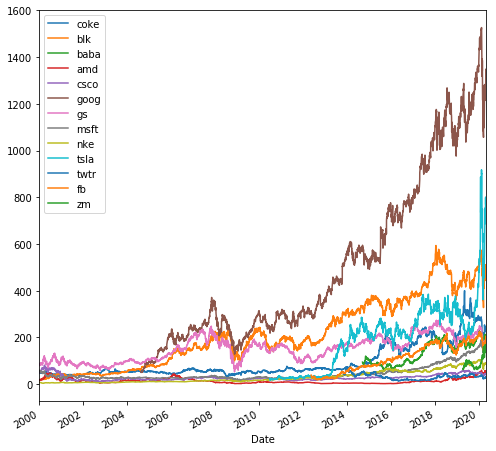

In [191]:
domestics.plot(figsize=[8,8])

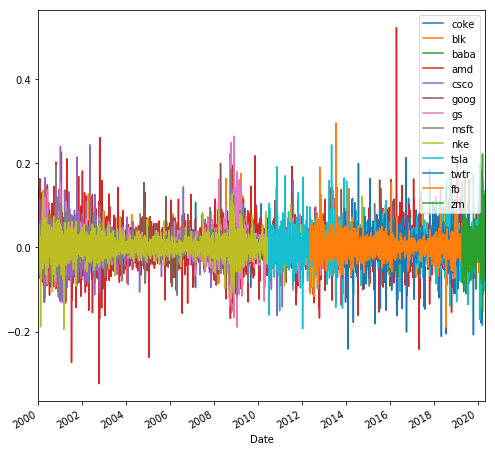

In [192]:
domestic_returns.plot(figsize=[8,8])

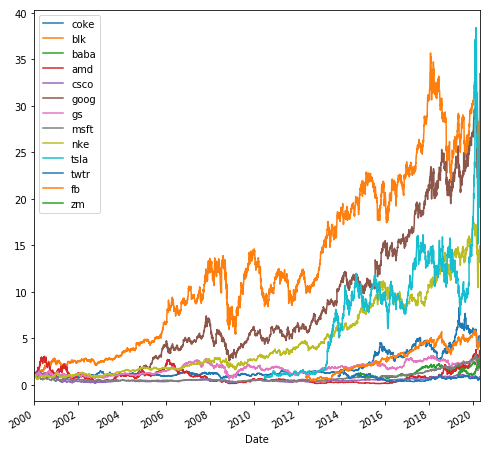

In [193]:
domestic_cum_returns.plot(figsize=[8,8])

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [194]:
# Calculate weighted portfolio returns
# Parse from 800 days ago
portfolio_returns = domestic_returns.iloc[-1500:, :]
# Drop down to five stocks
portfolio_returns = portfolio_returns.drop(columns=['blk','zm','gs','nke','msft','csco','coke','baba'])
# Create Portfolio Weights
weights = [1/5, 1/5, 1/5,1/5, 1/5]
# Calcuate weighted returns
weighted_returns = (weights * portfolio_returns)
# Add weighted returns
weighted_returns['portfolio_return'] = weighted_returns.sum(axis=1)
portfolio_return = weighted_returns.drop(columns=['goog','fb','tsla','twtr','amd'])
# Calculate cumulative Returns
cum_port_returns = (portfolio_return + 1).cumprod()

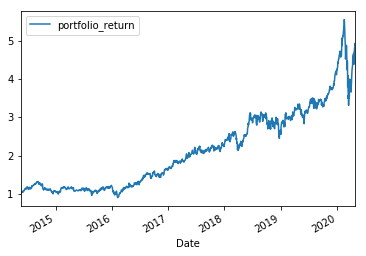

In [195]:
cum_port_returns.plot()

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [204]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
fund_returns = pd.merge(returns_df2, portfolio_return, how='left', on='Date')
fund_returns

,SOROS,PAULSON & CO.INC.,TIGER,BH,Algo 1,Algo 2,SP_500,portfolio_return
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.003501
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.000261
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.005851
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.018905
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000169
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.001597
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.008310
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.003193


In [205]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
fund_returns.dropna(inplace=True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [206]:
# Risk
daily_std = fund_returns.std()
daily_std

SOROS                 0.007888
PAULSON & CO.INC.     0.007030
TIGER                 0.010880
BH                    0.012922
Algo 1                0.007634
Algo 2                0.008342
SP_500                0.008462
portfolio_return      0.017569
dtype: float64

In [207]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS                 0.125225
PAULSON & CO.INC.     0.111593
TIGER                 0.172717
BH                    0.205127
Algo 1                0.121184
Algo 2                0.132429
SP_500                0.134328
portfolio_return      0.278901
dtype: float64

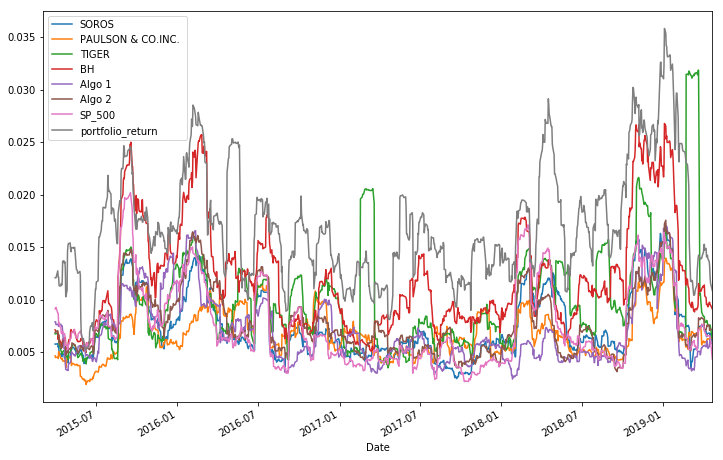

In [210]:
# Rolling
fund_returns.rolling(21).std().plot(figsize=[12,8])

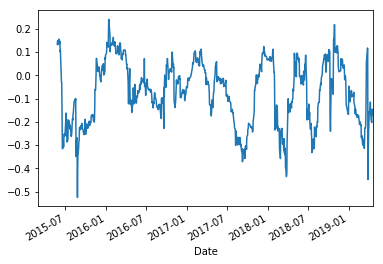

In [269]:
# Beta
# Beta Calc
covariance = fund_returns['Algo 1'].rolling(60).cov(fund_returns['SP_500'])
variance = fund_returns['Algo 1'].rolling(60).var()
beta = (covariance/variance)
beta.plot()

In [271]:
# Annualized Sharpe Ratios
daily_std = fund_returns.std()
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS                 0.125225
PAULSON & CO.INC.     0.111593
TIGER                 0.172717
BH                    0.205127
Algo 1                0.121184
Algo 2                0.132429
SP_500                0.134328
portfolio_return      0.278901
dtype: float64

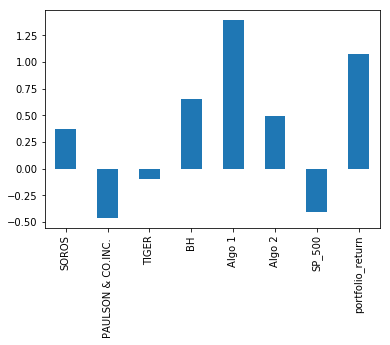

In [273]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios = (fund_returns.mean() * 252) / (fund_returns.std() * np.sqrt(252))
sharpe_ratios.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

In [279]:
# YOUR CODE HERE
corr = fund_returns.corr()
corr

,SOROS,PAULSON & CO.INC.,TIGER,BH,Algo 1,Algo 2,SP_500,portfolio_return
SOROS,1.000000,0.698937,0.558328,0.754039,0.320693,0.826348,-0.012133,0.625634
PAULSON & CO.INC.,0.698937,1.000000,0.432236,0.544382,0.268087,0.677489,0.004637,0.468200
TIGER,0.558328,0.432236,1.000000,0.422330,0.163177,0.505004,-0.015684,0.378203
BH,0.754039,0.544382,0.422330,1.000000,0.290765,0.687807,-0.024583,0.663667
Algo 1,0.320693,0.268087,0.163177,0.290765,1.000000,0.287639,-0.039110,0.203852
Algo 2,0.826348,0.677489,0.505004,0.687807,0.287639,1.000000,-0.011131,0.620902
SP_500,-0.012133,0.004637,-0.015684,-0.024583,-0.039110,-0.011131,1.000000,-0.026932
portfolio_return,0.625634,0.468200,0.378203,0.663667,0.203852,0.620902,-0.026932,1.000000


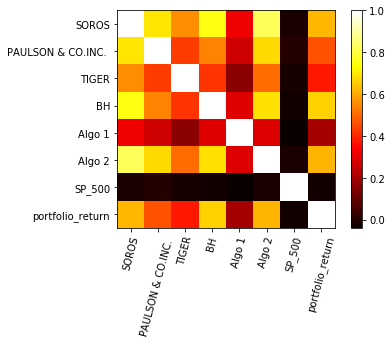

In [280]:
plt.imshow(corr,cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=75)
plt.yticks(range(len(corr)), corr.columns);